# Project: Investigate the TMDb movie dataset

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## INTRODUCTION
***

In [1]:
### import the necessary packages to work with the dataset  
import numpy as np
import pandas as pd

### import packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

### the magic word for inline visualizations in Jupyter notebook
% matplotlib inline

### package to parse dates
from datetime import datetime as dt
from datetime import date

***
### Description of the data 

<div><font size="3" face="Verdana" color="black">
<p>This dataset contains information about 10,000 movies collected from <a href = "https://www.themoviedb.org"  target="_blank">The Movie Database (TMDb)</a>. This data was processed by Udacity from The Movie Database on <a href = "https://www.kaggle.com/tmdb/tmdb-movie-metadata"  target="_blank">Kaggle</a>.</p> 
<p></p>
<p>We are going to investigate how various factors (such as budget, release time, genre, etc.) influence the revenue and the movie ratings.</p></font></div>

### Outline of the investigation

<div><font size="3" face="Verdana" color="black">

<ul>
<li span style="line-height:36px"> Is a certain genre associated to higher popularity?</li>

<li span style="line-height:36px"> What is the relation between popularity and vote average?</li>

<li span style="line-height:36px"> Do popular movies receive better vote average?</li>

<li span style="line-height:36px"> How does the frequency of genres vary over time?</li>

<li span style="line-height:36px"> For a particular genre, how do the ratings vary over time?</li>

<li span style="line-height:36px"> What kinds of properties are associated with movies that have high revenues?</li></ul></font></div>

<a id='wrangling'></a>

***
## DATA WRANGLING

### Gather the data

In [2]:
### load the TmdB movie dataset into a dataframe
df = pd.read_csv("tmdb-movies.csv")


***
### General Properties of the Dataset

In [3]:
### print the first four rows of the data
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


### Assess the Data

In [4]:
### display a concise summary of the dataframe,
### including the number of non-null values in each column,
### as well as the datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> According to Udacity, the columns 'budget_adj' and 'revenue_adj' show the budget and revenue of the associated movie in terms of 2010 dollars and accounting for inflation over time.
</font></div>

In [5]:
### the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
### the number of non-zero values in each column
df.astype(bool).sum(axis=0)

id                      10866
imdb_id                 10866
popularity              10866
budget                   5170
revenue                  4850
original_title          10866
cast                    10866
homepage                10866
director                10866
tagline                 10866
keywords                10866
overview                10866
runtime                 10835
genres                  10866
production_companies    10866
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj               5170
revenue_adj              4850
dtype: int64

<div><font size="3" face="Verdana" color="slateblue">
<b>Reflections:</b></font>
<p></p>
<font size="3" face="Verdana" color="black">
<ul>
<li span style="line-height:36px"> The 'homepage' column is missing most of its entries, also there are missing entries in several other columns, such as 'tagline', 'keywords' and 'production_companies'. These categories are not relevant to our analysis, we will ignore these missing values.</li>

<li span style="line-height:36px"> The 'budget' and the 'revenue' categories are not the best to work with. We notice from the 'release_year' column information that the movies in the database span a period of at least 56 years. Given the inflation and the lack of information on the type of currency we will work with 'budget_adj' and 'revenue_adj' columns.</li>

<li span style="line-height:36px"> We will start with removing all the unnecessary columns and rearrange the remaining columns.</li>

<li span style="line-height:36px"> Some data formatting is necessary, such as using date objects, removing excessive decimals and rewriting the scientific notation.</li>

<li span style="line-height:36px"> About half of the 'budget_adj' and 'revenue_adj' entries are zero, which probably means that those values are missing.</li>
</ul></font></div>

***
### Format the data

In [7]:
### remove most of the columns not involved in this analysis
movie_df = df.drop(columns=['id','imdb_id', 'budget', 'revenue', 'cast', 'homepage',
                            'director', 'tagline', 'keywords', 'overview', 'runtime',
                            'production_companies'])

### reorder the columns to better separate the independent and dependent variables
movie_df = movie_df[['original_title', 'release_date', 'release_year','genres',
                     'popularity', 'vote_count', 'vote_average', 'budget_adj', 
                     'revenue_adj']]

In [8]:
### rewrite the 'popularity' entries as float with 2 decimals only
movie_df['popularity'] = movie_df['popularity'].round(2)


In [9]:
### rewrite the 'budget_adj' and the 'revenue_adj' as integers, instead of scientific notation
movie_df['budget_adj'] = movie_df.budget_adj.map(lambda x: int(x))
movie_df['revenue_adj'] = movie_df.revenue_adj.map(lambda x: int(x))

In [10]:
### rewrite release_date as date object
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_date'] = movie_df['release_date'].dt.date

### extract the month, as an integer, from the release date information
movie_df['release_date'] = movie_df['release_date'].map(lambda x: int(x.strftime('%m')))

### rename the release_date column
movie_df = movie_df.rename(index=str, columns={'release_date': "release_month"})

In [11]:
### take a look at the trimmed database
movie_df.head(4)

,original_title,release_month,release_year,genres,popularity,vote_count,vote_average,budget_adj,revenue_adj
0,Jurassic World,6,2015,Action|Adventure|Science Fiction|Thriller,32.99,5562,6.5,137999939,1392445892
1,Mad Max: Fury Road,5,2015,Action|Adventure|Science Fiction|Thriller,28.42,6185,7.1,137999939,348161292
2,Insurgent,3,2015,Adventure|Science Fiction|Thriller,13.11,2480,6.3,101199955,271619025
3,Star Wars: The Force Awakens,12,2015,Action|Adventure|Science Fiction|Fantasy,11.17,5292,7.5,183999919,1902723129


In [12]:
### the summary for the trimmed dataframe
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, 0 to 10865
Data columns (total 9 columns):
original_title    10866 non-null object
release_month     10866 non-null int64
release_year      10866 non-null int64
genres            10843 non-null object
popularity        10866 non-null float64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
budget_adj        10866 non-null int64
revenue_adj       10866 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 848.9+ KB


<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> 'genres' is the only column that has NaN entries (23 null entries).  
</font></div>

In [13]:
### the non-unique values in the trimmed dataframe
movie_df.nunique()

original_title    10571
release_month        12
release_year         56
genres             2039
popularity          483
vote_count         1289
vote_average         72
budget_adj         2600
revenue_adj        4831
dtype: int64

***
### Data Cleaning: handle duplicates and zero values

In [14]:
### drop the entries that correspond to duplicates in the 'original_title' 
movie_df = movie_df.drop_duplicates('original_title')

In [15]:
### drop the rows that have zero 'budget_adj' or zero 'revenue_adj'
movie_df_adj= movie_df[movie_df['budget_adj'] > 0]
movie_df_adj = movie_df_adj[movie_df_adj['revenue_adj'] > 0]


In [16]:
### the number of non-unique values in the cleaned dataframe
movie_df_adj.nunique()

original_title    3755
release_month       12
release_year        56
genres            1033
popularity         475
vote_count        1262
vote_average        53
budget_adj        2048
revenue_adj       3747
dtype: int64

In [17]:
### the number of non-zero values in each column of the trimmed dataframe
movie_df_adj.astype(bool).sum(axis=0)

original_title    3755
release_month     3755
release_year      3755
genres            3755
popularity        3754
vote_count        3755
vote_average      3755
budget_adj        3755
revenue_adj       3755
dtype: int64

<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> There is one zero entry left in the 'popularity' column, which we will leave as it is.
</font></div>

<a id='eda'></a>

## EXPLORATORY DATA ANALYSIS

***
### General Observations

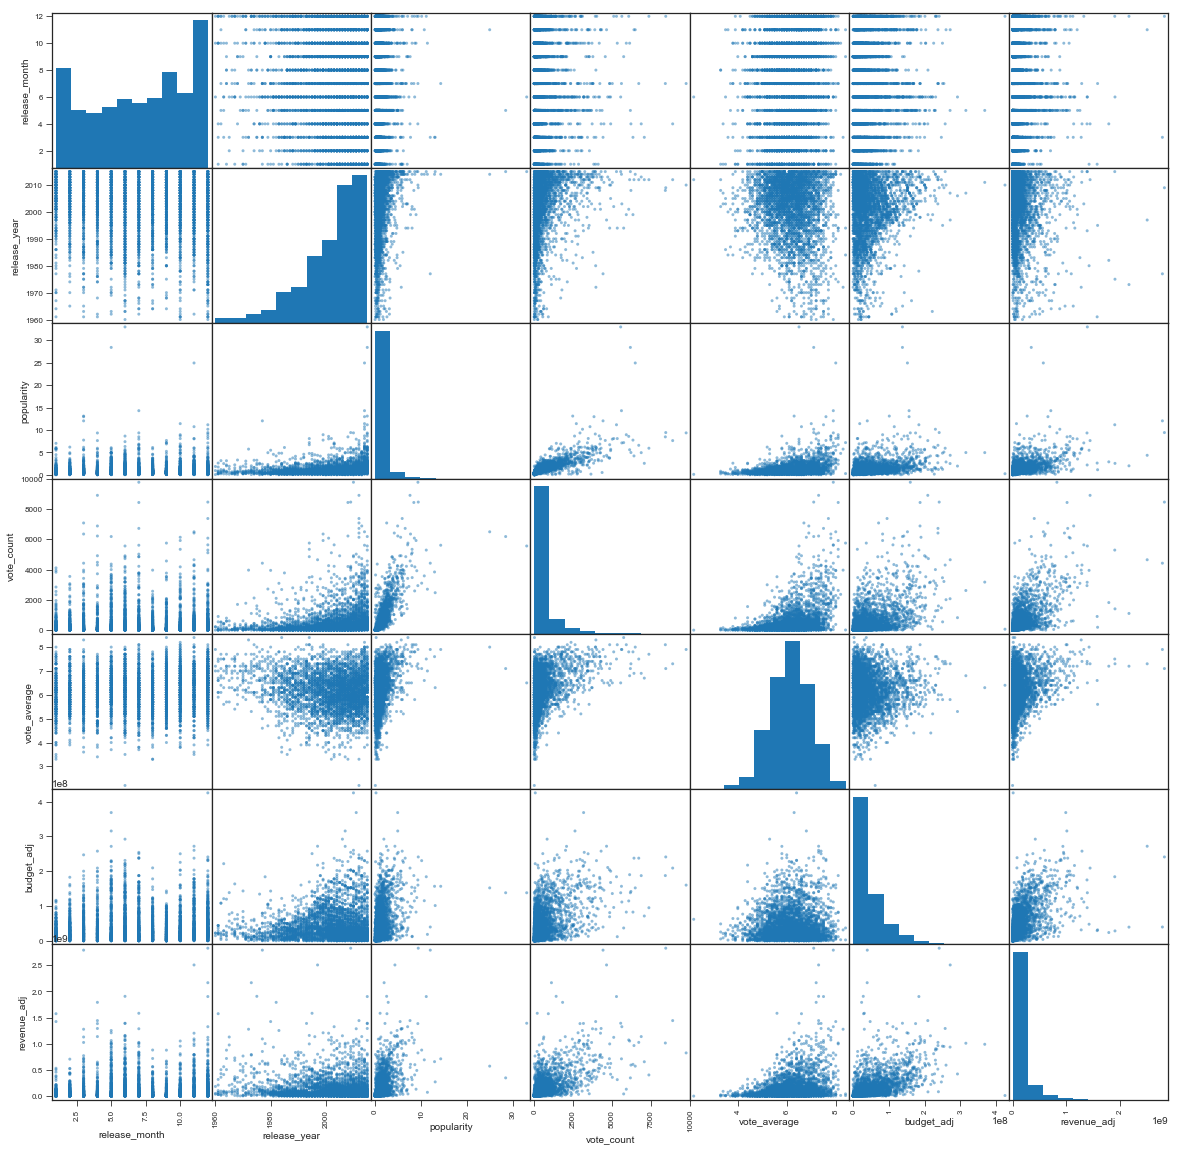

In [18]:
### the scatter plot matrix for the dataframe 'movie_df_adj', 
### the diagonal entries in this array are histograms

### set the seaborn style for better output
sns.set_style("ticks")

### the scatter plot matrix for the trimmed dataframe 'movie_df_adj'
pd.plotting.scatter_matrix(movie_df_adj, figsize=(20,20));

<div><font size="3" face="Verdana" color="slateblue">
<b>Reflections:</b></font>
<p></p>
<font size="3" face="Verdana" color="black">
<ul>
<li span style="line-height:36px"> From the histograms in the mattrix: 
<ul><li> December sees the largest number of released movies.</li>
    <li> 'popularity', 'vote_count', 'budget_adj' and 'revenue_adj' appear skewed to the right.</li>
    <li> 'released_year' is skewed to the left.</li></ul></li>
<li span style="line-height:36px"> From the scatter plots in the mattrix:
<ul><li>'popularity' is influenced by 'vote_count' and 'vote_average'.</li>
    <li>There are several outliers in the plots on the 'popularity' row.</li> 
     <li>'budget_adj' and 'revenue_adj' have increased over the years.</li></ul></li>
</ul></font></div>

***
### Reformat the genres information

In [19]:
### split the strings in the 'genres' column in lists, 
### then expand each list to return a new dataframe
genres_split = movie_df_adj['genres'].str.split('|', expand=True)

### take a look at the information contained in the dataframe
genres_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 10848
Data columns (total 5 columns):
0    3755 non-null object
1    3120 non-null object
2    2049 non-null object
3    846 non-null object
4    249 non-null object
dtypes: object(5)
memory usage: 176.0+ KB


<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> Each movie is characterised by 1 to 5 genres from the list. Since most of the movies have two genres description, we will drop the last three entries from the genres description.
</font></div>

In [20]:
### rename columns
genres_split[['g1','g2','g3','g4', 'g5']]= genres_split

### adjust the columns, keep only the first three genres for each entry
genres_split = genres_split.drop(columns=[0,1,2,3,4, 'g3', 'g4', 'g5'])

### take a look at the result
genres_split.head()

,g1,g2
0,Action,Adventure
1,Action,Adventure
2,Adventure,Science Fiction
3,Action,Adventure
4,Action,Crime


In [21]:
### append the genres information to the cleaned movies dataframe
### rename the dataframe
movie_genre = pd.concat([movie_df_adj, genres_split],axis=1) 

### take a look at the new dataframe
movie_genre.head()

,original_title,release_month,release_year,genres,popularity,vote_count,vote_average,budget_adj,revenue_adj,g1,g2
0,Jurassic World,6,2015,Action|Adventure|Science Fiction|Thriller,32.99,5562,6.5,137999939,1392445892,Action,Adventure
1,Mad Max: Fury Road,5,2015,Action|Adventure|Science Fiction|Thriller,28.42,6185,7.1,137999939,348161292,Action,Adventure
2,Insurgent,3,2015,Adventure|Science Fiction|Thriller,13.11,2480,6.3,101199955,271619025,Adventure,Science Fiction
3,Star Wars: The Force Awakens,12,2015,Action|Adventure|Science Fiction|Fantasy,11.17,5292,7.5,183999919,1902723129,Action,Adventure
4,Furious 7,4,2015,Action|Crime|Thriller,9.34,2947,7.3,174799923,1385748801,Action,Crime


<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> We will regard the movie's genre to be determined by the first entry in the initial description. This genre is contained in column 'g1' of the dataframe.
</font></div>

In [22]:
### get a list of genres
### and the number of movies that correspond to each genre
movie_genre['g1'].value_counts()

Drama              868
Comedy             777
Action             672
Adventure          304
Horror             252
Crime              167
Thriller           159
Fantasy            109
Animation           99
Science Fiction     95
Romance             63
Family              39
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: g1, dtype: int64

<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> There is only one TV Movie while the genres Romance, Family, Mystery, Documentary, Music, War, History and Western are poorly represented.  
</font></div>

***
## Q1: Is a certain genre associated with higher popularity?

***
### Q1a: Which genres have the highest average 'popularity'?

In [23]:
### get the mean 'popularity', 'vote_count' and 'vote_average' values by genre
genre_means = movie_genre.groupby(['g1'], as_index=False)['popularity','vote_count','vote_average'].mean()

### limit the decimals
genre_means = genre_means.round(2)

### sort the entries in decreasing order of mean 'popularity'
genre_means.sort_values(['popularity'], ascending=False)

,g1,popularity,vote_count,vote_average
14,Science Fiction,1.95,1079.31,6.25
1,Adventure,1.94,1009.80,6.26
17,War,1.66,702.70,6.48
2,Animation,1.65,900.21,6.35
8,Fantasy,1.59,705.28,6.09
7,Family,1.58,661.13,6.08
0,Action,1.44,725.60,5.99
9,History,1.44,554.41,6.49
13,Romance,1.34,501.35,6.43
18,Western,1.19,425.88,6.42


#### Create a line plot for the means of the genre popularities

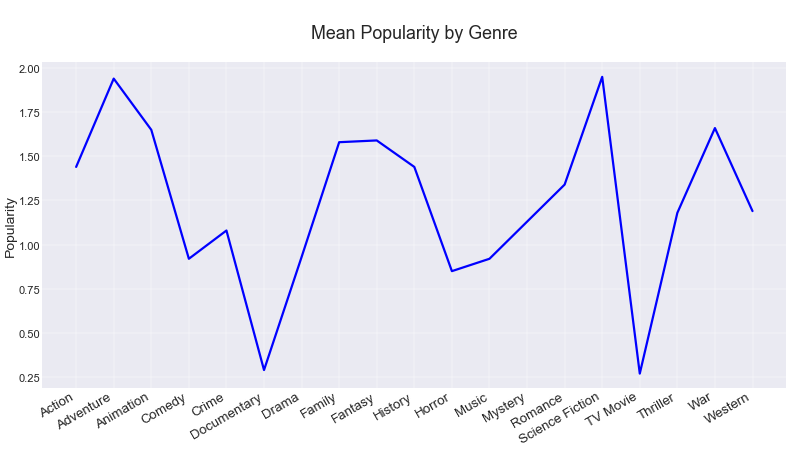

In [24]:
### adjust the seaborn figure style
sns.set_style('darkgrid')

### create the figure in which the line plot will be drawn
plt.figure(figsize=(24, 12), dpi=40, linewidth=2, frameon=True)

### the line plot
plt.plot(genre_means['g1'], genre_means['popularity'], color='b', linewidth=4)

### the title
plt.title('\n Mean Popularity by Genre \n', fontsize=32)

### beautify the x-labels and ticks
plt.gcf().autofmt_xdate()
plt.xticks(fontsize = 24) 

### the y-labels and ticks
plt.ylabel('Popularity', fontsize=25)
plt.yticks(fontsize=20)

plt.show()

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments regarding the mean 'popularity':</b>
<p></p>
<p>The genres Science Fiction and Adventure receive the highest mean popularity ratings. </p>
</font></div>

### Q1b: Which genres receive the highest popularity ratings?

<font size="3" face="Verdana" color="black">
Insert a classification column that is based on the four quantiles of the distribution of popularity values.</font>

    Unpopular: Lowest 25% of popularity ratings
    LowPopular: 25% - 50% of popularity ratings
    Popular: 50% - 75% of popularity ratings
    MostPopular: 75% - max popularity rating

In [25]:
### view the minimum, 25%, 50%, 75%, maximum popularity values
movie_genre['popularity'].describe()

count    3755.000000
mean        1.194945
std         1.486344
min         0.000000
25%         0.460000
50%         0.800000
75%         1.370000
max        32.990000
Name: popularity, dtype: float64

In [26]:
### bin edges that will be used to group the data
bin_cuts = [ 0, 0.46, 0.80, 1.37, 32.99] 

In [27]:
### labels for the four popularity groups
bin_names = [ 'Unpopular', 'LowPopular', 'Popular' ,'MostPopular' ]

In [28]:
### create popularity levels column, call it 'ranking'
movie_genre['ranking'] = pd.cut(movie_genre['popularity'], bin_cuts, labels=bin_names)

### check for successful creation of this column
movie_genre.head()

,original_title,release_month,release_year,genres,popularity,vote_count,vote_average,budget_adj,revenue_adj,g1,g2,ranking
0,Jurassic World,6,2015,Action|Adventure|Science Fiction|Thriller,32.99,5562,6.5,137999939,1392445892,Action,Adventure,MostPopular
1,Mad Max: Fury Road,5,2015,Action|Adventure|Science Fiction|Thriller,28.42,6185,7.1,137999939,348161292,Action,Adventure,MostPopular
2,Insurgent,3,2015,Adventure|Science Fiction|Thriller,13.11,2480,6.3,101199955,271619025,Adventure,Science Fiction,MostPopular
3,Star Wars: The Force Awakens,12,2015,Action|Adventure|Science Fiction|Fantasy,11.17,5292,7.5,183999919,1902723129,Action,Adventure,MostPopular
4,Furious 7,4,2015,Action|Crime|Thriller,9.34,2947,7.3,174799923,1385748801,Action,Crime,MostPopular


In [29]:
### find the mean 'popularity' of each of the 'ranking' groups
movie_genre.groupby(['ranking'], as_index=False)['popularity'].mean()

,ranking,popularity
0,Unpopular,0.295069
1,LowPopular,0.626013
2,Popular,1.059071
3,MostPopular,2.810832


In [30]:
### the counts for the four levels of 'popularity' in the movie dataframe
movie_genre['ranking'].value_counts()

Unpopular      947
LowPopular     943
MostPopular    938
Popular        926
Name: ranking, dtype: int64

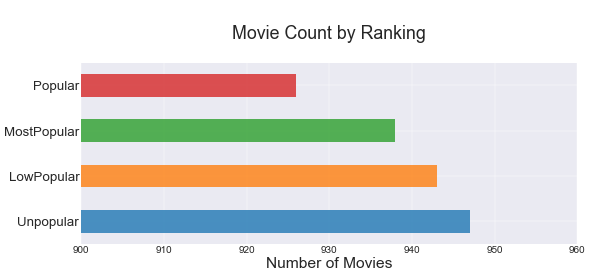

In [31]:
### create a bar chart for the movies count on ranking levels

### the figure in which the chart will be drawn
plt.figure(figsize=(16,6), dpi=40, linewidth=2, frameon=True)

### the horizontal bar chart
count_by_ranking = movie_genre['ranking'].value_counts()
count_by_ranking.plot(kind='barh', alpha=.8)

### the title
plt.title('\n Movie Count by Ranking \n', fontsize=32)

### set x-axis interval, labels and ticks
plt.xlim([900, 960])
plt.xlabel('Number of Movies', fontsize=28)
plt.xticks(fontsize=18)

### set the location and labels of yticks
plt.yticks(np. arange(4), fontsize = 24)

plt.show()


<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> For the next several steps of our analysis we will focus on the group of MostPopular movies.
</font></div>

In [32]:
### create a dataframe that contains only the movies that are ranked as MostPopular
mostPopular_movies = movie_genre[movie_genre['ranking']=='MostPopular']

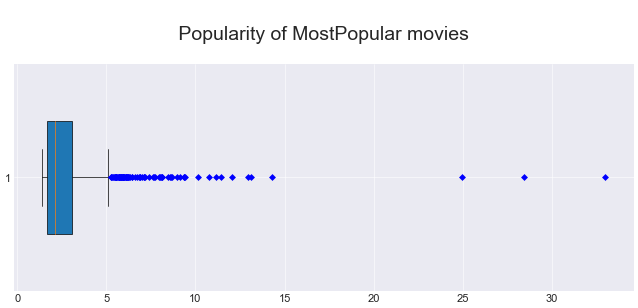

In [33]:
### boxplot for the 'popularity' column 

### create the figure in which the chart will be drawn
plt.figure(figsize=(16,6), dpi=50, linewidth=2, frameon=True)

### the horizontal boxplot
plt.boxplot(mostPopular_movies['popularity'], sym='bD', vert=False, widths=.5, 
            patch_artist=True, showfliers=True)

### title and ticks  
plt.title('\n Popularity of MostPopular movies \n', fontsize=28)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()



<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> There are several outliers present, among which 3 are extreme. We will remove these three extreme outliers from our analysis.
</font></div>

In [34]:
### remove the rows that correspond to the extreme outliers in the 'popularity' column
mostPopular_movies = mostPopular_movies[mostPopular_movies['popularity'] < 15]

In [35]:
### take a look at the count by genre of the MostPopular movies
### sort in descending order

mostPopular_movies.groupby(['g1'])['original_title'].count().nlargest(20)

g1
Action             185
Adventure          152
Drama              149
Comedy             139
Animation           54
Fantasy             43
Science Fiction     41
Thriller            38
Crime               33
Horror              31
Romance             25
Family              15
Mystery              9
War                  8
Music                8
History              4
Western              1
Name: original_title, dtype: int64

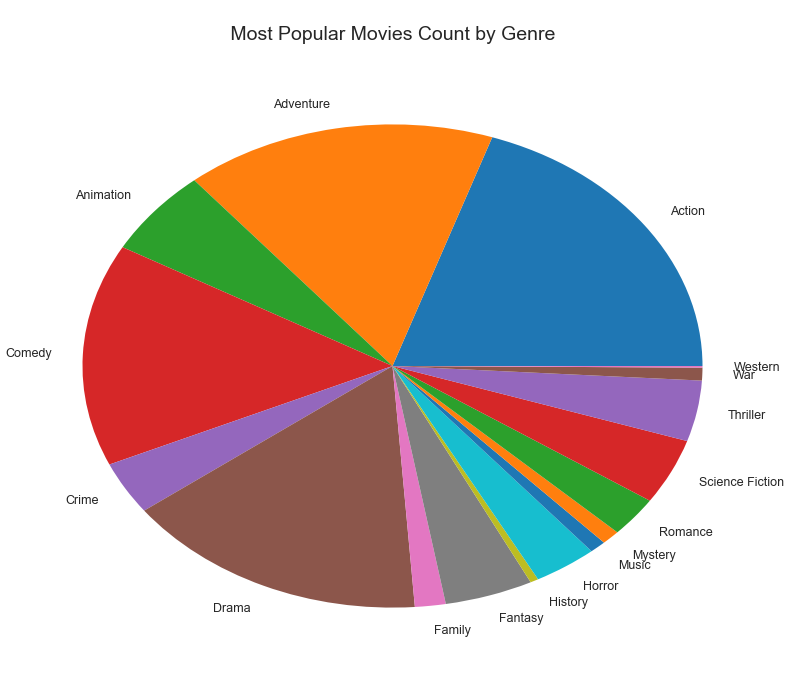

In [36]:
### pie chart for the genre distribution in the subset of MostPopular movies 

### create the figure in which the chart will be drawn
plt.figure(figsize=(20, 16), dpi=50, linewidth=2, frameon=True)

### the pie chart
mostPopular_movies.groupby(['g1'])['popularity'].count().plot(kind='pie', fontsize=18)
plt.ylabel('')

### the title
plt.title('\n Most Popular Movies Count by Genre \n', fontsize=28)

plt.show()

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the MostPopular movies:</b>

<p></p>

<p>Among the MostPopular movies, the most numerous are the Action movies, followed by the Adventure movies.</p>

<p>Also close are the Comedy and the Drama genres. We notice a large gap between the fourth (Comedy) and the fifth position (Animation) in this list.</p>

</font></div>

### Q1c: Percentages of Action or Adventure movies that are ranked as Most Popular

In [37]:
### the number of Action movies with MostPopular ranking
mostPopular_Action = mostPopular_movies[mostPopular_movies['g1'] == 'Action'].count()

### the number of all Action movies in the cleaned dataset 
all_Action = movie_genre[movie_genre['g1'] == 'Action'].count()

### the percentage of MostPopular Action movies
percentage_Action = mostPopular_Action / all_Action

### the number of Action movies with MostPopular ranking
mostPopular_Adventure = mostPopular_movies[mostPopular_movies['g1'] == 'Adventure'].count()

### the number of all Action movies in the cleaned dataset 
all_Adventure = movie_genre[movie_genre['g1'] == 'Adventure'].count()

### the percentage of MostPopular Action movies
percentage_Adventure = mostPopular_Adventure / all_Adventure

### print out the results
print('The percentage of MostPopular Action movies is {}\n'.format(percentage_Action[1]))
print('The percentage of MostPopular Adventure movies is {}'.format(percentage_Adventure[1]))


The percentage of MostPopular Action movies is 0.27529761904761907

The percentage of MostPopular Adventure movies is 0.5


<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on Action and Adventure movies:</b>
<p> The frequency of MostPopular Adventure movies is almost twice than the frequency of MostPopular Action movies. </p>
</font></div>

In [38]:
### compute basic statistics for 'popularity' in the MostPopular movies group
mostPopular_movies.groupby(['g1'])['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
g1,,,,,,,,
Action,185.0,3.086270,2.147334,1.38,1.7400,2.39,3.6300,14.31
Adventure,152.0,3.032697,2.001840,1.38,1.7775,2.23,3.3625,13.11
Animation,54.0,2.413704,1.043491,1.38,1.6500,1.91,2.9975,5.68
Comedy,139.0,2.192662,0.946863,1.38,1.5550,1.86,2.5700,6.72
Crime,33.0,2.707576,1.448674,1.41,1.5600,1.96,3.5700,5.90
Drama,149.0,2.503221,1.422199,1.38,1.6400,2.04,2.6600,8.95
Family,15.0,2.982000,1.661149,1.59,1.9500,2.43,2.9950,7.40
Fantasy,43.0,2.798372,1.340900,1.47,1.8450,2.46,3.1400,7.03
History,4.0,3.855000,2.888327,1.75,2.2975,2.78,4.3375,8.11


<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Concluding Comments Q1:</b>

<p></p>
<p>The Action and Adventure are by far the most popular genres, with the Action genre just slightly more popular.</p>
</font></div>

***
## Q2: Do popular movies receive better vote average?
***

### Q2a: What is the relation between popularity and vote average?

In [39]:
### remove the three extreme outliers in 'popularity' from the main dataframe also
movie_genre = movie_genre[movie_genre['popularity'] < 15]

In [40]:
### the correlation coefficient between 'popularity' and 'vote_average'

### for the cleaned and trimmed dataset
corr_pop_vav = movie_genre['vote_average'].corr(movie_genre['popularity'])
print('The correlation coefficient between "popularity" and "vote_average" \n in the cleaned movie dataset is {}\n'.format(corr_pop_vav))

### for the MostPopular movies set
corr_pop_vav_MP = mostPopular_movies['vote_average'].corr(mostPopular_movies['popularity'])
print('The correlation coefficient between "popularity" and "vote_average" \n in the MostPopular dataset is {}\n'.format(corr_pop_vav_MP))

The correlation coefficient between "popularity" and "vote_average" 
 in the cleaned movie dataset is 0.3523605916565939

The correlation coefficient between "popularity" and "vote_average" 
 in the MostPopular dataset is 0.34655749309428285



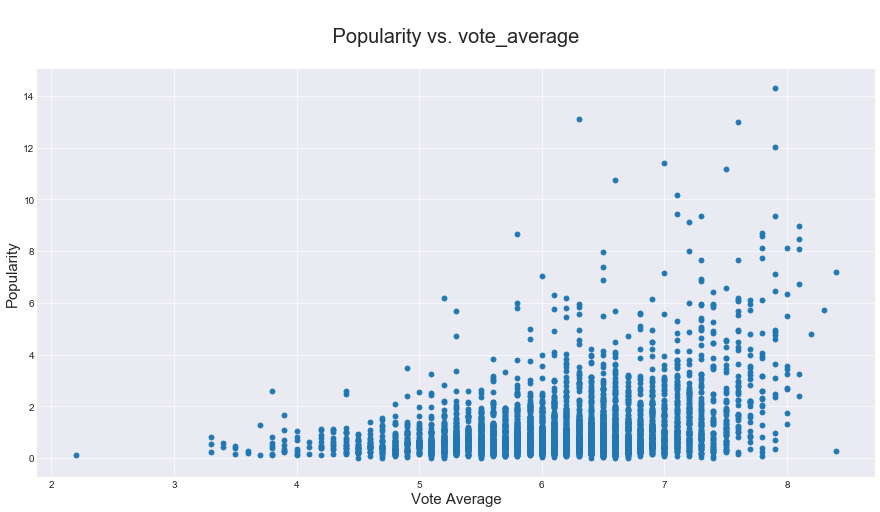

In [41]:
### scatterplot of popularity vs vote average for the trimmed dataset

### create the figure in which the scatterplot will be drawn
plt.figure(figsize=(18, 9), dpi=60, linewidth=2, frameon=True)

### the scatter plot
plt.scatter(x= 'vote_average', y='popularity', data=movie_genre);

### the title
plt.title('\n Popularity vs. vote_average \n', fontsize=24);

### the labels and ticks
plt.xlabel('Vote Average', fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('Popularity', fontsize=18)
plt.yticks(fontsize=12)

plt.show()


<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the relation between popularity and vote average:</b>

<p></p>

<p> The correlation coefficients between popularity and vote_average for the two datasets (all movies and most popular movies) are quite small, so we do not expect a clear relationship between these two type of rankings.</p>

<p> In the scatterplot we notice a cloud like behaviour for the movies with highest vote average, in the sense that they tend to be more popular.</p>

</font></div>

***
### Q2b: How does the vote average vary by genre?

In [42]:
### basic statistics for the 'vote_average' in the cleaned dataset
### group by genre and sort in descending order of mean 'vote_average'

movie_genre.groupby(['g1'])['vote_average'].describe().sort_values(['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
g1,,,,,,,,
Documentary,32.0,6.656250,0.899081,4.5,6.400,6.75,7.225,8.4
History,17.0,6.494118,0.798804,4.4,6.200,6.60,6.900,8.0
War,20.0,6.480000,0.727360,5.3,5.775,6.60,7.100,7.6
Crime,167.0,6.453892,0.757592,3.8,6.000,6.40,7.000,7.9
Drama,868.0,6.444816,0.743047,3.8,5.900,6.50,6.900,8.4
Romance,63.0,6.431746,0.679142,4.8,5.900,6.50,6.850,7.8
Western,16.0,6.418750,0.577603,5.7,5.975,6.25,6.875,7.5
Animation,99.0,6.347475,0.762025,2.2,6.000,6.40,6.800,7.6
Adventure,303.0,6.252475,0.781397,3.7,5.800,6.20,6.800,8.0


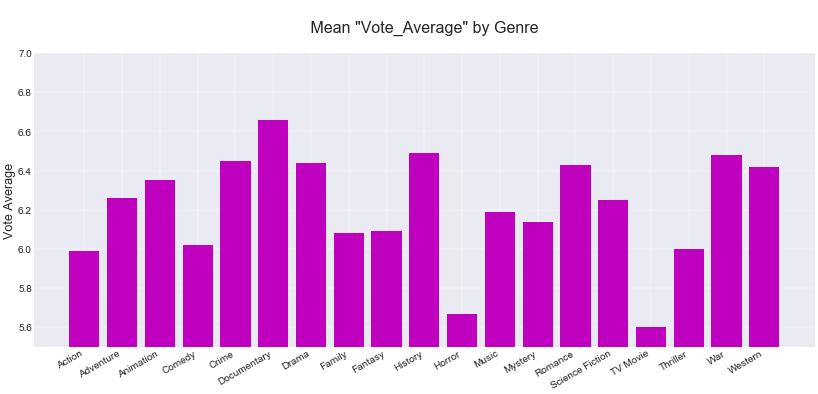

In [43]:
#### a bar chart for the means of vote_average entries:

### create the figure in which the bar chart will be drawn
plt.figure(figsize=(28, 12), dpi=36, linewidth=2, frameon=True)

### the bar chart
plt.bar(genre_means['g1'], genre_means['vote_average'], color='m')

### the title
plt.title('\n Mean "Vote_Average" by Genre \n', fontsize=32)

### the x-labels and ticks
plt.gcf().autofmt_xdate()
plt.xticks(fontsize = 20) 

### the y-labels and ticks
plt.ylim([5.5, 7])
plt.ylabel('Vote Average', fontsize=25)
plt.yticks(fontsize=20)

plt.show()

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the relation between vote average and genre:</b>

<p></p>

<p> The first three genres that receive the best mean 'vote_average' scores (Documentary, History and War) are not among the most popular genres.</p>

<p> Regarding the two most popular genres: Adventure receives better vote averages than Action.</p>

</font></div>

***
### Q2c: How does vote average vary within popularity levels?

In [44]:
### determine the maximum and the minimum values the vote average takes

print('maximum vote average is {}\n'. format(movie_genre['vote_average'].max()))      
print('minimum vote average is {}\n'. format(movie_genre['vote_average'].min()))

maximum vote average is 8.4

minimum vote average is 2.2



<font size="3" face="Verdana" color="black">
Insert a classification scale for the vote average and insert it into the table. </font>

    Excellent: 7.5 - 9.00
    Average: 5.00 - 7.49
    Poor: 2.50 - 4.99
    Terrible: 1.00 - 2.49

In [45]:
### bin edges that will be used to group the data

vote_cuts = [ 1, 2.50, 5.00, 7.50, 9.00] 

In [46]:
### labels for the vote_average ratings

vote_labels = ['Terrible', 'Poor', 'Average', 'Excellent']

In [47]:
### create vote_average levels column, call it 'vote_rank'
movie_genre['vote_rank'] = pd.cut(movie_genre['vote_average'], vote_cuts, labels=vote_labels)

### check for successful creation of this column
movie_genre.head()

,original_title,release_month,release_year,genres,popularity,vote_count,vote_average,budget_adj,revenue_adj,g1,g2,ranking,vote_rank
2,Insurgent,3,2015,Adventure|Science Fiction|Thriller,13.11,2480,6.3,101199955,271619025,Adventure,Science Fiction,MostPopular,Average
3,Star Wars: The Force Awakens,12,2015,Action|Adventure|Science Fiction|Fantasy,11.17,5292,7.5,183999919,1902723129,Action,Adventure,MostPopular,Average
4,Furious 7,4,2015,Action|Crime|Thriller,9.34,2947,7.3,174799923,1385748801,Action,Crime,MostPopular,Average
5,The Revenant,12,2015,Western|Drama|Adventure|Thriller,9.11,3929,7.2,124199945,490314247,Western,Drama,MostPopular,Average
6,Terminator Genisys,6,2015,Science Fiction|Action|Thriller|Adventure,8.65,2598,5.8,142599937,405355075,Science Fiction,Action,MostPopular,Average


In [48]:
### count to see how the vote_rank is distributed in each popularity level 
counts_ratings=movie_genre.groupby(['ranking', 'vote_rank']).count()['g1']
counts_ratings

ranking      vote_rank
Unpopular    Terrible       1.0
             Poor         132.0
             Average      806.0
             Excellent      8.0
LowPopular   Terrible       NaN
             Poor          95.0
             Average      846.0
             Excellent      2.0
Popular      Terrible       NaN
             Poor          53.0
             Average      859.0
             Excellent     14.0
MostPopular  Terrible       NaN
             Poor          16.0
             Average      818.0
             Excellent    101.0
Name: g1, dtype: float64

In [49]:
###the number of movies in each popularity level
totals_popularity = movie_genre.groupby('ranking').count()['g1']
totals_popularity

ranking
Unpopular      947
LowPopular     943
Popular        926
MostPopular    935
Name: g1, dtype: int64

In [50]:
### proportion of each vote_rank level for every popularity level
proportion = counts_ratings/totals_popularity
proportion

ranking      vote_rank
Unpopular    Terrible     0.001056
             Poor         0.139388
             Average      0.851109
             Excellent    0.008448
LowPopular   Terrible          NaN
             Poor         0.100742
             Average      0.897137
             Excellent    0.002121
Popular      Terrible          NaN
             Poor         0.057235
             Average      0.927646
             Excellent    0.015119
MostPopular  Terrible          NaN
             Poor         0.017112
             Average      0.874866
             Excellent    0.108021
Name: g1, dtype: float64

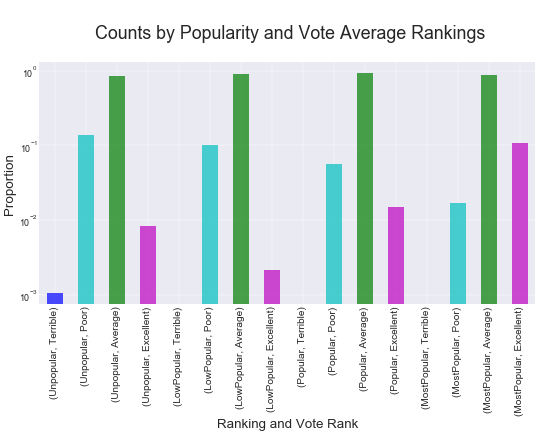

In [51]:
### visualize the proportions with a bar chart
### use a logarithmic scale to improve the appereance 

### create the figure in which the bar chart will be drawn
plt.figure(figsize=(16, 8), dpi=40, linewidth=2, frameon=True)

def_color = ['b', 'c', 'g', 'm']*4 

###the bar chart
proportion.plot(kind='bar', color=def_color, alpha=.7, log=True)

### the labels and the ticks
plt.title('\n Counts by Popularity and Vote Average Rankings\n', fontsize=32)
plt.xlabel('Ranking and Vote Rank', fontsize=24)
plt.ylabel('Proportion', fontsize=24)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16)


plt.show()

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the distribution of the vote rank within popularity levels:</b>
<p></p>
<p> Each popularity level is dominated by the average vote rank (proportion ranging between 0.85 to 0.93). Regarding the Excellent vote rank, there is a higher proprtion of such scores in the MostPopular movies category.</p>
</font></div>

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Concluding Comments Q2:</b>
<p></p>
<p>The MostPopular movies also tend to receive Excellent viewers' vote ratings more often than the other popularity levels movies.</p>
</font></div>

***
## Q3: Evolution of genres over time

***
### Q3a: How does the production of the most numerous genres vary over time?

In [52]:
### determine the most numerous genres 
movie_genre.groupby('g1').count()['release_year'].nlargest(6)


g1
Drama        868
Comedy       777
Action       670
Adventure    303
Horror       252
Crime        167
Name: release_year, dtype: int64

<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> We will retain the first three genres: Drama, Comedy and Action as they are significantly more numerous than the remaining ones.</font></div>

In [53]:
### find the number of movies released every year
time_genre = movie_genre.groupby(['release_year']).count()['original_title']

### find the proportion of Drama movies released every year
drama_movies = movie_genre[movie_genre['g1'] == 'Drama']
drama_prop = drama_movies.groupby(['release_year']).count()['original_title']/time_genre

### find the proportion of Comedy movies released every year
comedy_movies = movie_genre[movie_genre['g1'] == 'Comedy']
comedy_prop = comedy_movies.groupby(['release_year']).count()['original_title']/time_genre

### find the proportion of Action movies released every year
action_movies = movie_genre[movie_genre['g1'] == 'Action']
action_prop = action_movies.groupby(['release_year']).count()['original_title']/time_genre

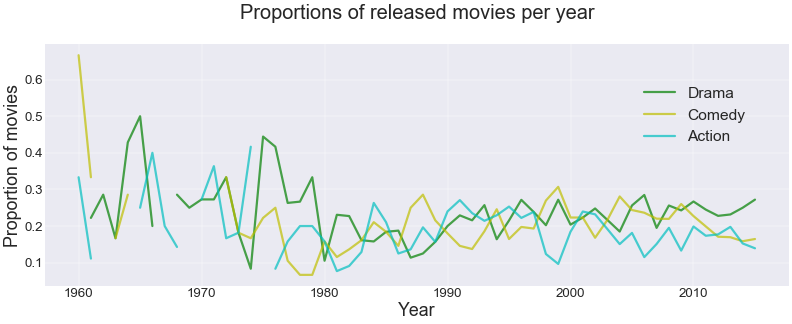

In [54]:
### line chart for the evolution of the frequency of the most numerous genres over time

### create the figure in which the line chart will be drawn
plt.figure(figsize=(24, 8), dpi=40, linewidth=2, frameon=True)

### the three line plots
ldrama = drama_prop.plot(color = 'g', linewidth=4, alpha=.7, label = 'Drama')
lcomedy = comedy_prop.plot(color = 'y', linewidth=4, alpha=.7, label = 'Comedy')
laction = action_prop.plot(color = 'c', linewidth=4, alpha=.7, label = 'Action')

### the title, labels and the ticks
plt.title('Proportions of released movies per year\n', fontsize=36)

plt.xlabel('Year', fontsize=32)
plt.ylabel('Proportion of movies', fontsize=32)

plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

### add grid to the graph
plt.rc('grid', linestyle="-", color='k')
plt.grid(True)

### the legend 
plt.legend(bbox_to_anchor=(0.95, 0.85), loc=1, borderaxespad=0., fontsize=28)

plt.grid(True)
plt.show()


<div class="alert alert-block alert-info">
<font size="3" face="Verdana" color="black">
<b>NOTE:</b> The frequency patterns are clear in this representation; so we decided to keep the line chart as it and not to process it further using line fitting techniques.
</font></div>

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the frequency of released movies from the most numerous genres:</b>
<p></p>
<p> As a general trend in the past 35 years, the three genres have been produced at pretty much similar rates, with the expected annual variations.</p>
<p> There were relatively more Drama movies produced in the sixties and seventies.</p>
<p> The Comedy genre has a significant peak in 1960, about 70 percent of the movies belong to this genre. On the other side, around 1979 less than 10 percent of the movies were Comedy movies.</p>
</font></div>

***
### Q3b: How does the production of Drama movies vary over time?

In [55]:
### divide the time interval from 1960 to 2015 into 5 years periods
lustrum = [1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]

### create labels for the cuts
lustrum_labels = ['60-65','65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-00', '00-05','05-10', '10-15' ]

In [56]:
### create time intervals column, call it 'lustrums'
movie_genre['lustrums'] = pd.cut(movie_genre['release_year'], lustrum, labels=lustrum_labels)

### check for successful creation of this column
movie_genre.head(4)

,original_title,release_month,release_year,genres,popularity,vote_count,vote_average,budget_adj,revenue_adj,g1,g2,ranking,vote_rank,lustrums
2,Insurgent,3,2015,Adventure|Science Fiction|Thriller,13.11,2480,6.3,101199955,271619025,Adventure,Science Fiction,MostPopular,Average,10-15
3,Star Wars: The Force Awakens,12,2015,Action|Adventure|Science Fiction|Fantasy,11.17,5292,7.5,183999919,1902723129,Action,Adventure,MostPopular,Average,10-15
4,Furious 7,4,2015,Action|Crime|Thriller,9.34,2947,7.3,174799923,1385748801,Action,Crime,MostPopular,Average,10-15
5,The Revenant,12,2015,Western|Drama|Adventure|Thriller,9.11,3929,7.2,124199945,490314247,Western,Drama,MostPopular,Average,10-15


In [57]:
### find the mean values for the subset of movies that belong to the Drama genre
drama_movies = movie_genre[movie_genre['g1'] == 'Drama']

### group the mean values by 'lustrums'
drama_means = drama_movies.groupby('lustrums').mean()

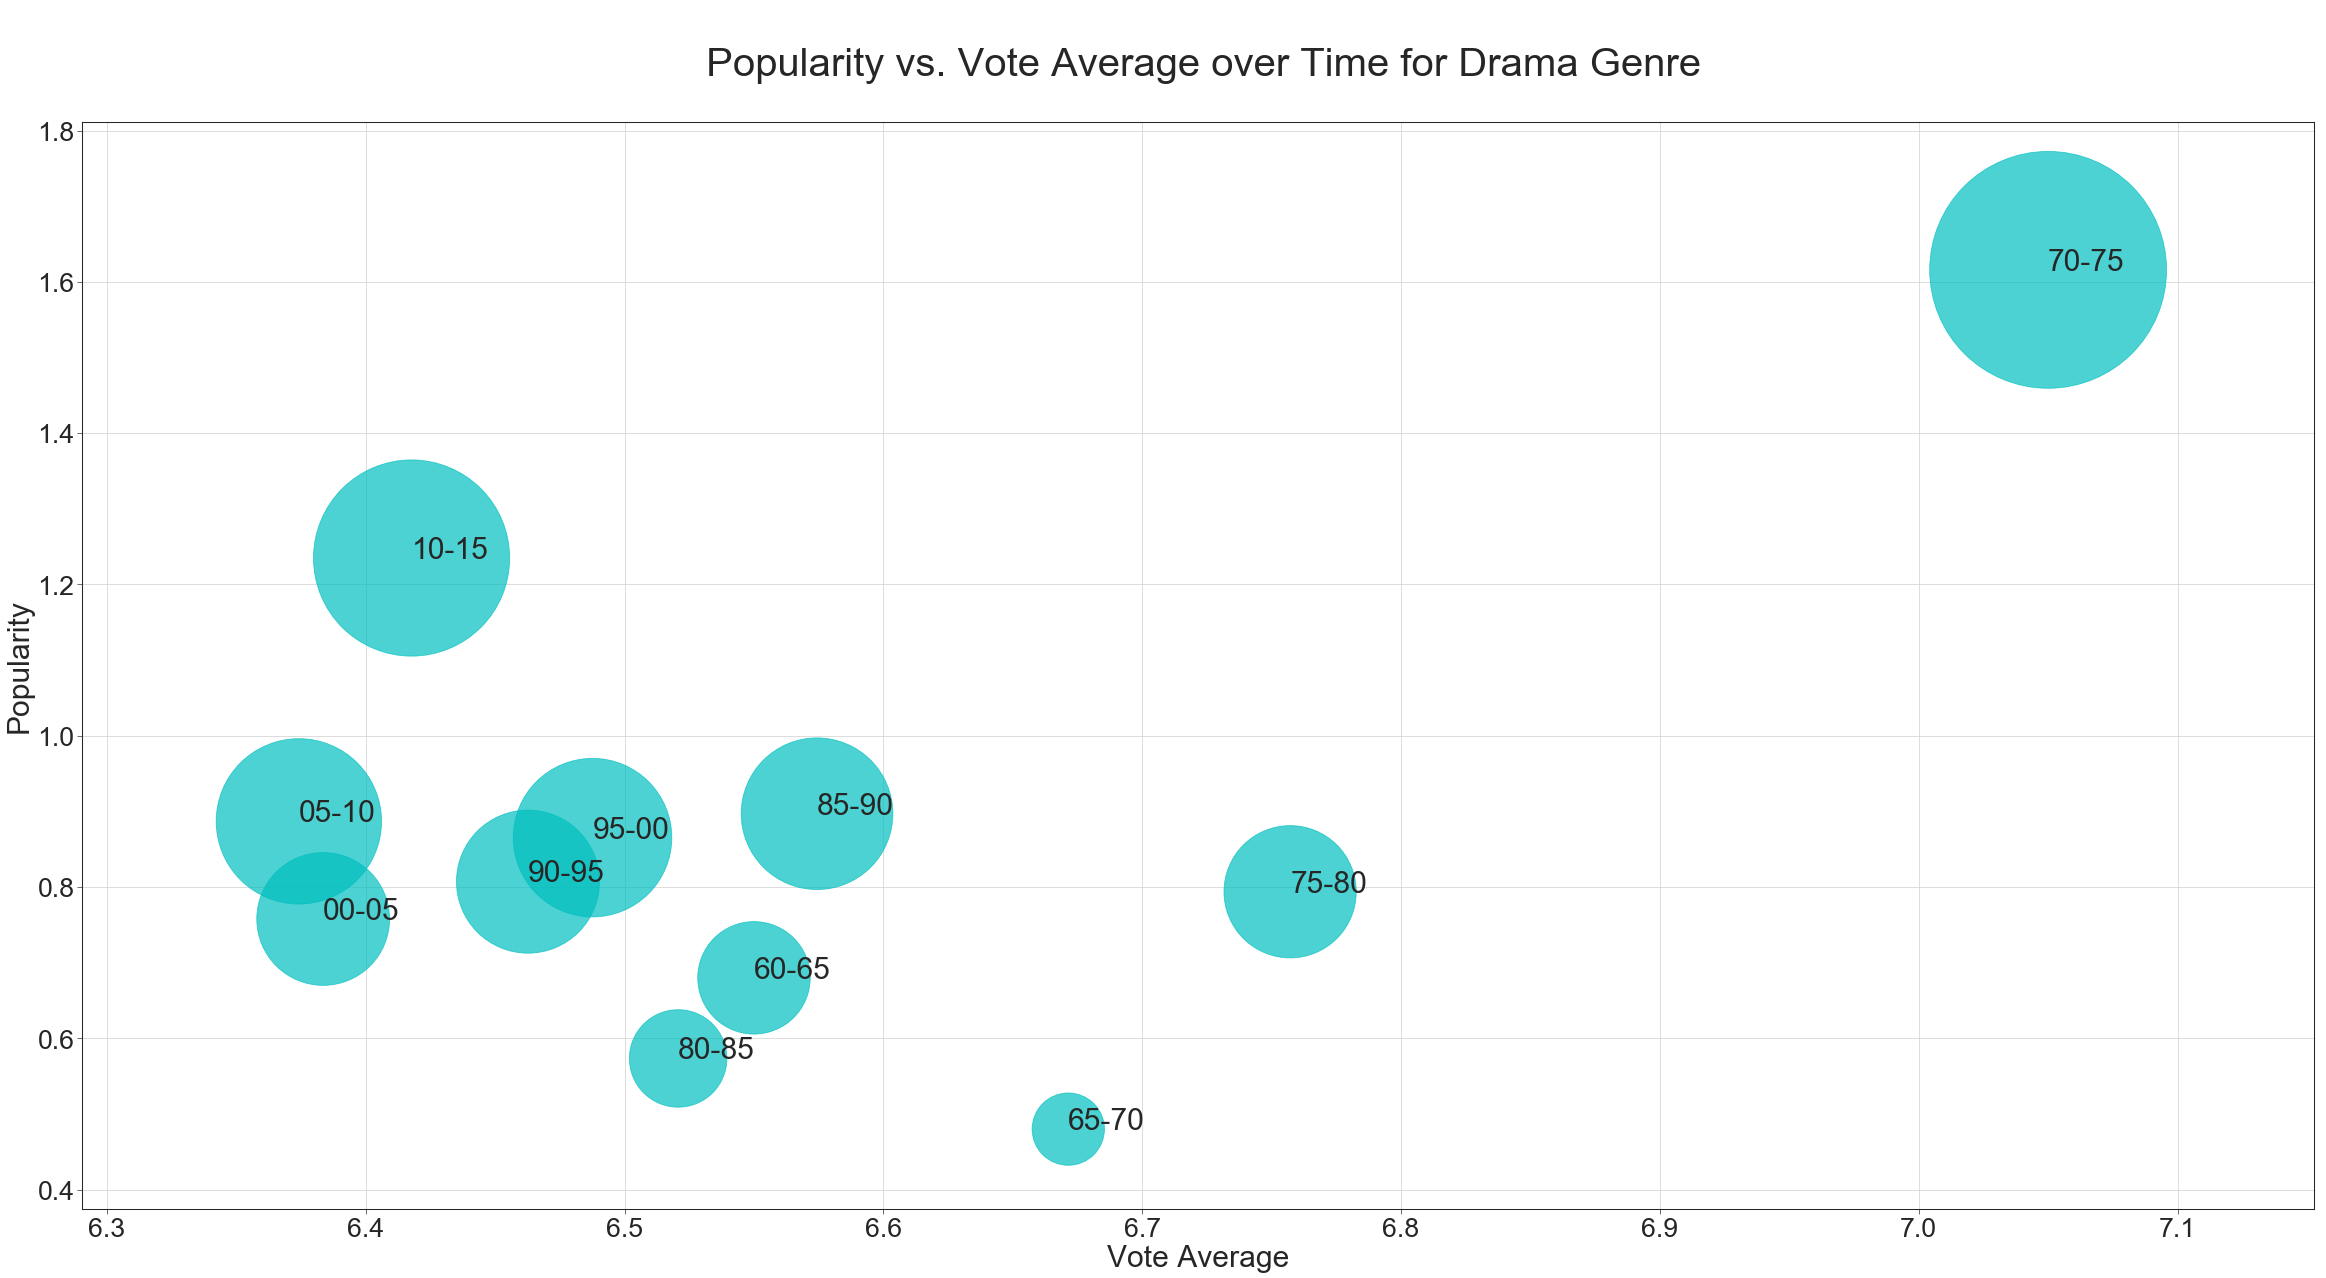

In [58]:
### for the mean values of the Drama movies table
### create a bubble plot that has the Vote Average and Popularity on the two axes,
### draw bubbles of size related to the vote_count entries,
### the bubble tags correspond to the time intervals

### change the seaborn style to a lighter background
sns.set_style("ticks")

### set the properties of the underlying figure
fig = plt.figure(figsize=(48, 24), dpi=60, linewidth=2, frameon=True)

### information for the bubble size
areas=drama_means['vote_count']

###the scatter plot
dplot=plt.scatter(x='vote_average', y='popularity', data=drama_means,s=areas*100, color='c', alpha=.7)

### the title
plt.title('\n Popularity vs. Vote Average over Time for Drama Genre\n', fontsize=48);

### the labels and the ticks
plt.xlabel('Vote Average', fontsize=36)
plt.ylabel('Popularity', fontsize=36)
plt.xticks(fontsize = 32)
plt.yticks(fontsize = 32)

### create the bubbles' labels based on the entries in 'lustrums' column
xlist=drama_means['vote_average']
ylist=drama_means['popularity']

for i, txt in enumerate(lustrum_labels):
    plt.annotate(txt, (xlist[i],ylist[i]), fontsize=36)

plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the evolution of the Drama genre over time:</b>
<p></p>
<p> The Drama movies were by far popular and high vote rated in the period from 1970 to 1975. The least popular years are 2000-2010, followed by a slight increase in popularity in 2010-2015 period.</p>
</font></div>

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Concluding comments Q3:</b>
<p></p>
<p> The two decades from 1960 to 1980 seem to be dominated by the Drama genre. After 1990 the Comedy, Drama and Action consistently represent more than half of the movies released every year.</p>
</font></div>

***
## Q4: What kind of properties are associated to high revenue movies? 
***

### Q4a: How do the ratings of the movies with highest and lowest revenues compare?

In [59]:
### find the 85th percentile of the adjusted revenue
highrev = movie_genre['revenue_adj'].quantile(.85)
highrev

258868631.74999994

In [60]:
### the highest revenue movies
high_rev = movie_genre[movie_genre['revenue_adj'] >=highrev]

In [61]:
### find the 15th percentile of the adjusted revenue
lowrev = movie_genre['revenue_adj'].quantile(.15)

In [62]:
### the lowest revenue movies
low_rev = movie_genre[movie_genre['revenue_adj'] <= lowrev]

In [63]:
### the count of highest revenue movies grouped by popularity and vote average rankings
high_rev.groupby(['ranking', 'vote_rank']).count()['original_title']

ranking      vote_rank
Unpopular    Terrible       NaN
             Poor           NaN
             Average       21.0
             Excellent      NaN
LowPopular   Terrible       NaN
             Poor           NaN
             Average       36.0
             Excellent      1.0
Popular      Terrible       NaN
             Poor           2.0
             Average      103.0
             Excellent      2.0
MostPopular  Terrible       NaN
             Poor           2.0
             Average      348.0
             Excellent     48.0
Name: original_title, dtype: float64

In [64]:
### the count of lowest revenue movies grouped by popularity and vote average rankings
low_rev.groupby(['ranking', 'vote_rank']).count()['original_title']

ranking      vote_rank
Unpopular    Terrible       1.0
             Poor          49.0
             Average      266.0
             Excellent      4.0
LowPopular   Terrible       NaN
             Poor          28.0
             Average      133.0
             Excellent      NaN
Popular      Terrible       NaN
             Poor           3.0
             Average       64.0
             Excellent      1.0
MostPopular  Terrible       NaN
             Poor           1.0
             Average       11.0
             Excellent      1.0
Name: original_title, dtype: float64

In [65]:
### the count of high revenue movies grouped by popularity ranking
high_count = high_rev.groupby(['ranking'])['vote_rank'].count()
print('High revenue movies grouped by {}\n'.format(high_count))

### the count of low revenue movies grouped by popularity ranking
low_count = low_rev.groupby(['ranking'])['vote_rank'].count()
print('Low revenue movies grouped by {}\n'.format(low_count))

High revenue movies grouped by ranking
Unpopular       21
LowPopular      37
Popular        107
MostPopular    398
Name: vote_rank, dtype: int64

Low revenue movies grouped by ranking
Unpopular      320
LowPopular     161
Popular         68
MostPopular     13
Name: vote_rank, dtype: int64



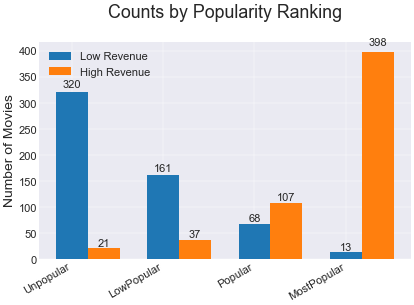

In [66]:
### create side by side bar charts for popularity rankings for 
### high and low revenue movies

### adjust the seaborn figure style
sns.set_style('darkgrid')


N = 4
indx = np.arange(N)  # the x locations for the groups
width = 0.35         # the width of the bars

### create the figure in which the bar chart will be drawn
plt.figure(figsize=(12, 8), dpi=40, linewidth=2, frameon=True)

ax=plt.subplot(1,1,1)
p1 = ax.bar(indx, low_count, width)
p2 = ax.bar(indx + width, high_count, width)

### the title
plt.title('Counts by Popularity Ranking\n', fontsize=32)

### the y-axis label and ticks
plt.ylabel('Number of Movies', fontsize=25)
plt.yticks(fontsize=20)

### the x-axis labels and ticks
plt.gcf().autofmt_xdate()
plt.xticks(indx, bin_names, fontsize=20)

plt.legend((p1[0], p2[0]), ('Low Revenue', 'High Revenue'), fontsize=20)

def info_label(chart): ### adapted from code on StackOverflow
    """
    Attach a text label above each bar displaying its height
    """
    for bar in chart:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 1.02*height,
                 '%d' % int(height),
                ha='center', va='bottom', fontsize=20),
        

info_label(p1)
info_label(p2)

plt.show()

In [67]:
### the count of high revenue movies grouped by vote average ranking
high_count_rank = high_rev.groupby(['vote_rank'])['ranking'].count()
print('High revenue movies grouped by {}\n'.format(high_count_rank))

### the count of low revenue movies grouped by vote average ranking
low_count_rank = low_rev.groupby(['vote_rank'])['ranking'].count()
print('Low revenue movies grouped by {}\n'.format(low_count_rank))

High revenue movies grouped by vote_rank
Terrible       0
Poor           4
Average      508
Excellent     51
Name: ranking, dtype: int64

Low revenue movies grouped by vote_rank
Terrible       1
Poor          81
Average      474
Excellent      6
Name: ranking, dtype: int64



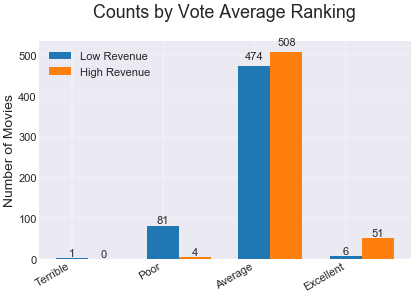

In [68]:
### create side by side bar charts for popularity rankings for 
### high and low revenue movies

N = 4
indx = np.arange(N)  # the x locations for the groups
width = 0.35         # the width of the bars

### create the figure in which the bar chart will be drawn
plt.figure(figsize=(12, 8), dpi=40, linewidth=2, frameon=True)

ax=plt.subplot(1,1,1)
p1 = ax.bar(indx, low_count_rank, width)
p2 = ax.bar(indx + width, high_count_rank, width)

### the title
plt.title('Counts by Vote Average Ranking\n', fontsize=32)

### the y-axis label and ticks
plt.ylabel('Number of Movies', fontsize=25)
plt.yticks(fontsize=20)

### the x-axis labels and ticks
plt.gcf().autofmt_xdate()
plt.xticks(indx, vote_labels, fontsize=20)

plt.legend((p1[0], p2[0]), ('Low Revenue', 'High Revenue'), fontsize=20)

def info_label(chart): ### adapted from a code on StackOverflow
    """
    Attach a text label above each bar displaying its height
    """
    for bar in chart:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 1.02*height,
                 '%d' % int(height),
                ha='center', va='bottom', fontsize=20),
        

info_label(p1)
info_label(p2)

plt.show()

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the rankings of high and low revenue movies:</b>
<p></p>
<p> <u>Popularity</u>: Most of the low revenue movies are Unpopular or LowPopular. About 70% of the high revenue movies are MostPopular, followed by another 18% that are Popular.</p>
<p> <u>Vote Average</u>: For both groups of revenues, the majority of the movies receives Average vote rankings. Among the movies that score Excellent vote averages, most of them are high revenue movies. On the other side, most movies that receive Poor vote averages have low revenues.</p>
</font></div>

***
### Q4b: Do movies with higher revenues also have higher budgets?

In [69]:
### the correlation coefficient between 'budget_adj' and 'revenue_adj'
### for the cleaned and trimmed dataset
corr_br = movie_genre['budget_adj'].corr(movie_genre['revenue_adj'])
print('The correlation coefficient between "budget_adj" and "revenue_adj" \n in the cleaned movie dataset is {}\n'.format(corr_br))


The correlation coefficient between "budget_adj" and "revenue_adj" 
 in the cleaned movie dataset is 0.5724530712549387



In [70]:
### the correlation coefficient between 'budget_adj' and 'revenue_adj'
### for the high revenue movies dataset
corr_br_high = high_rev['budget_adj'].corr(high_rev['revenue_adj'])
print('The correlation coefficient between "budget" and "revenue" \n for the dataset of high revenue movies is {}\n'.format(corr_br_high))


The correlation coefficient between "budget" and "revenue" 
 for the dataset of high revenue movies is 0.24158154517534897



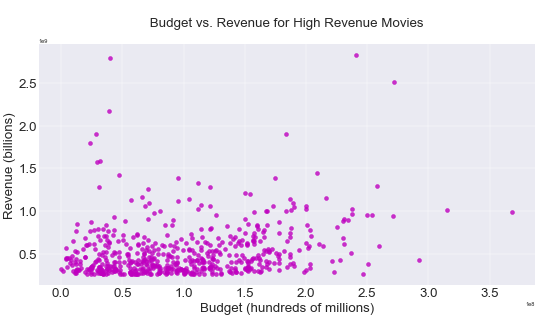

In [71]:
### scatterplot of adjusted budget vs adjusted revenue
### for the subset of high revenue movies

### create the figure in which the line chart will be drawn
plt.figure(figsize=(16, 8), dpi=40, linewidth=2, frameon=True)

### the scatter plot
plt.scatter(x= 'budget_adj', y='revenue_adj', data=high_rev, s=50, color='m', alpha=.8);

### the title
plt.title('\n Budget vs. Revenue for High Revenue Movies \n', fontsize=24);

### the labels 
plt.xlabel('Budget (hundreds of millions)', fontsize=24)
plt.ylabel('Revenue (billions)', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.show()

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b> Comments on the relation between budget and revenue:</b>
<p> The correlation coefficient between the budget and revenue for high revenue movies dataset is about half of the same correlation coefficient for the entire dataset. This indicates that there is no direct relationship between budget and high revenue. The same observation can also be derived from the scatterplot.</p>
</font></div>

***
### Q4c: During which months are the high revenue movies released?

In [72]:
### the proportions of monthly distribution of the release of high revenue movies
monthly = high_rev.groupby(['release_month'])['ranking'].count()/high_rev.count()['g1']

### sort the percentages in decreasing order
monthly.nlargest(12)

release_month
6     0.174067
12    0.161634
5     0.140320
11    0.127886
7     0.120782
3     0.062167
10    0.053286
4     0.044405
8     0.042629
9     0.033748
2     0.023091
1     0.015986
Name: ranking, dtype: float64

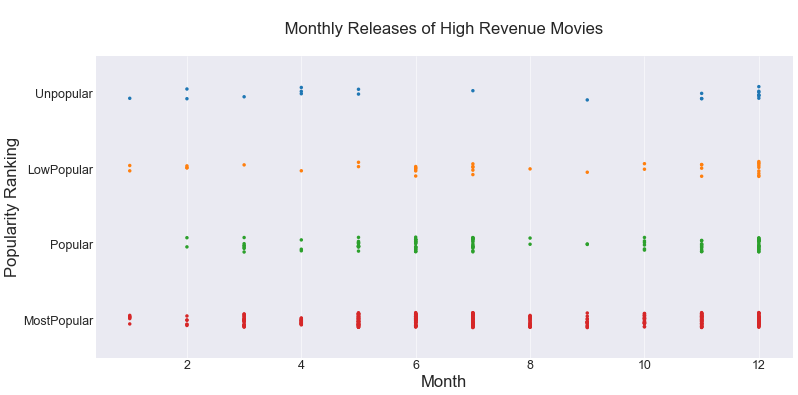

In [73]:
### scatterplot of monthly releases, grouped by popularity
### for the subset of high revenue movies

### create the figure in which the plot will be drawn
plt.figure(figsize=(18, 8), dpi=50, linewidth=2, frameon=True)

### the scatter plot
sns.stripplot(x="release_month", y="ranking", data=high_rev, jitter=True)

### the title
plt.title('\n Monthly Releases of High Revenue Movies \n', fontsize=24);

### the labels and ticks
plt.xlabel('Month', fontsize=24)
plt.ylabel('Popularity Ranking', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Comments on the monthly releases of high revenue movies:</b>
<p> The largest proportions of high revenue movies are released in June and December.</p>
</font></div>

<div class="alert alert-block alert-success">
<font size="3" face="Verdana" color="black">
<b>Concluding comments Q4:</b>
<p> It is not surprising to learn that the movies that are very popular also have high revenues.</p>
<p> The high revenue movies do not seem to receive better vote averages from the viewers.</p>
<p> The high revenue movies do not necessarily have higher budgets. </p>
</font>
</div>

<a id='conclusions'></a>

## CONCLUSIONS

<div><font size="3" face="Verdana" color="black">
<p> We start with a dataset of more than 10000 movies extracted from the TMDb movie dataset and provided by Udacity. After data wrangling, which involved dropping a large number of missing and zero values we obtained a dataset of about 3700 entries. The analysis is performed on this cleaned dataset. Only basic descriptive statistics is used. All inferences are observational, no predictions are made.</p>
<p></p>
<p> The analysis is performed on a small number of movies, the data is not rigorously documented and therefore has certain limitations.</p>
<p></p>
<p> Here is a brief outline of our foundings. The Action and Adventure movies are the most popular genres. The most popular movies tend to receive better viewer average ratings. Regarding the evolution of genres over years, there was a high proportion of Drama movies released in the period 1960 - 1980. After 1990 the released movies mostly fall in one of the categories Comedy, Drama or Action. The most popular movies generate higher revenues, but they receive average vote ratings. A large budget does not usually guarantee a high revenue. </p></font></div>

<div><font size="3" face="Verdana" color="black">
<b>References</b>

<ol>
<li> <a href = "https://www.wikipedia.org/"  target="_blank">Wikipedia</a>.</li>
<li> <a href = "https://stackoverflow.com/" target="_blank">Stack Overflow</a>.</li>
<li> <a href = "https://www.udacity.com/" target="_blank">Udacity Website</a>.</li>
<li> <a href = "www.imdb.com/" target="_blank">IMDb Website</a>.</li>
<li> <a href = "https://www.kaggle.com/rounakbanik/the-movies-dataset" target="_blank">Kaggle Movies Dataset</a>.</li>
<li> <a href = "https://matplotlib.org/" target="_blank">Matplotlib Website</a>.</li>
<li> Ilya Ezepov, IMDb exploratory data analysis project (2015) <a href = "http://rstudio-pubs-static.s3.amazonaws.com/52740_40aabe898b7a46b99c2b3f4ca3042e8a.html" target="_blank">link</a>.</li></ol></font></div>